# The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

# About Dataset
<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

## Variable Notes
<p><b>pclass</b>: A proxy for socio-economic status (SES)<br> 1st = Upper<br> 2nd = Middle<br> 3rd = Lower<br><br> <b>age</b>: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5<br><br> <b>sibsp</b>: The dataset defines family relations in this way...<br> Sibling = brother, sister, stepbrother, stepsister<br> Spouse = husband, wife (mistresses and fiancés were ignored)<br><br> <b>parch</b>: The dataset defines family relations in this way...<br> Parent = mother, father<br> Child = daughter, son, stepdaughter, stepson<br> Some children travelled only with a nanny, therefore parch=0 for them.</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl



In [103]:
font_prop = {
    'family':'Times New Roman',
    'size':20,
    'weight':'medium'
}
mpl.rc('font', **font_prop)

In [60]:
df_train = pd.read_csv("datasets/titanic/train.csv")
df_test = pd.read_csv("datasets/titanic/test.csv")

## Getting feel of data

In [61]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [62]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [121]:
sel_feat = df_train[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Survived', 'Parch']]

In [122]:
sel_feat #selecting only required features

,Pclass,Sex,Age,Fare,Embarked,Survived,Parch
0,3,male,22.0,7.2500,S,0,0
1,1,female,38.0,71.2833,C,1,0
2,3,female,26.0,7.9250,S,1,0
3,1,female,35.0,53.1000,S,1,0
4,3,male,35.0,8.0500,S,0,0
...,...,...,...,...,...,...,...
886,2,male,27.0,13.0000,S,0,0
887,1,female,19.0,30.0000,S,1,0
888,3,female,NaN,23.4500,S,0,2
889,1,male,26.0,30.0000,C,1,0


In [123]:
sel_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Fare      891 non-null    float64
 4   Embarked  889 non-null    object 
 5   Survived  891 non-null    int64  
 6   Parch     891 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [124]:
sel_feat['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [125]:
for col in sel_feat.columns:
    print(f"Column = {col}")
    print(sel_feat[col].value_counts())
    print(sel_feat[col].value_counts().sum())
    print("---\n")

Column = Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64
891
---

Column = Sex
male      577
female    314
Name: Sex, dtype: int64
891
---

Column = Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64
714
---

Column = Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64
891
---

Column = Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64
889
---

Column = Survived
0    549
1    342
Name: Survived, dtype: int64
891
---

Column = Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
891
---



In [126]:
sel_feat.dropna(inplace=True) #dropping all nan values bz ages can't be used and embarked too

c:\users\paude\appdata\local\programs\python\python38\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [127]:
sel_feat

,Pclass,Sex,Age,Fare,Embarked,Survived,Parch
0,3,male,22.0,7.2500,S,0,0
1,1,female,38.0,71.2833,C,1,0
2,3,female,26.0,7.9250,S,1,0
3,1,female,35.0,53.1000,S,1,0
4,3,male,35.0,8.0500,S,0,0
...,...,...,...,...,...,...,...
885,3,female,39.0,29.1250,Q,0,5
886,2,male,27.0,13.0000,S,0,0
887,1,female,19.0,30.0000,S,1,0
889,1,male,26.0,30.0000,C,1,0


In [128]:
y_train = sel_feat['Survived']

In [129]:
X_train = sel_feat.drop('Survived', axis=1)

In [130]:
X_train

,Pclass,Sex,Age,Fare,Embarked,Parch
0,3,male,22.0,7.2500,S,0
1,1,female,38.0,71.2833,C,0
2,3,female,26.0,7.9250,S,0
3,1,female,35.0,53.1000,S,0
4,3,male,35.0,8.0500,S,0
...,...,...,...,...,...,...
885,3,female,39.0,29.1250,Q,5
886,2,male,27.0,13.0000,S,0
887,1,female,19.0,30.0000,S,0
889,1,male,26.0,30.0000,C,0


Lets do some plotting jobs

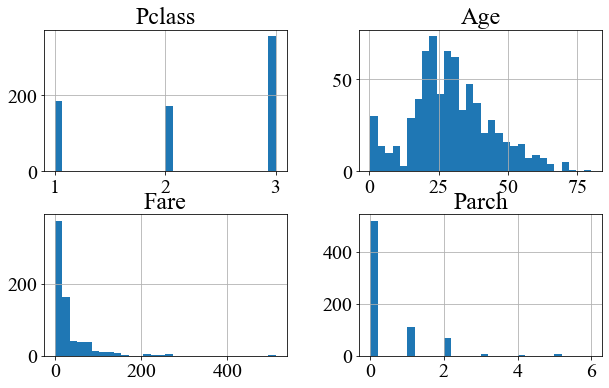

In [131]:
X_train.hist(bins=30, figsize=(10,6))
plt.show()

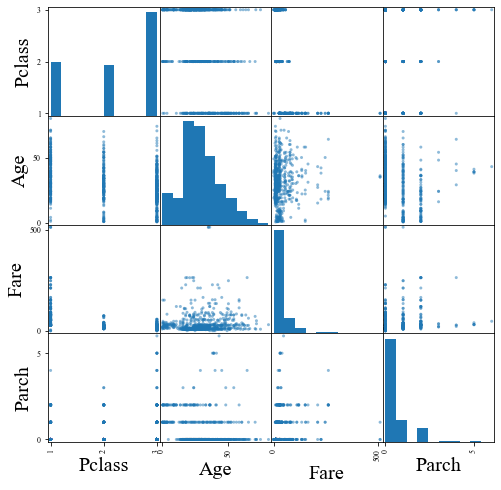

In [132]:
from pandas.plotting import scatter_matrix

scatter_matrix(X_train, figsize=(8,8))
plt.show()

In [133]:
sex_cat  = X_train['Sex']
embarked_cat = X_train['Embarked']

In [134]:
embarked_cat

0      S
1      C
2      S
3      S
4      S
      ..
885    Q
886    S
887    S
889    C
890    Q
Name: Embarked, Length: 712, dtype: object

In [135]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

sex_cat_encoded = ordinal_encoder.fit_transform(sex_cat.values.reshape(-1,1))
embarked_cat_encoded = ordinal_encoder.fit_transform(embarked_cat.values.reshape(-1,1))

In [136]:
sex_cat_encoded[:5], sex_cat[:5]

(array([[1.],
        [0.],
        [0.],
        [0.],
        [1.]]),
 0      male
 1    female
 2    female
 3    female
 4      male
 Name: Sex, dtype: object)

In [137]:
embarked_cat_encoded[700:], embarked_cat[700:]

(array([[2.],
        [0.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [1.],
        [2.],
        [2.],
        [0.],
        [1.]]),
 877    S
 879    C
 880    S
 881    S
 882    S
 883    S
 884    S
 885    Q
 886    S
 887    S
 889    C
 890    Q
 Name: Embarked, dtype: object)

In [138]:
X_train

,Pclass,Sex,Age,Fare,Embarked,Parch
0,3,male,22.0,7.2500,S,0
1,1,female,38.0,71.2833,C,0
2,3,female,26.0,7.9250,S,0
3,1,female,35.0,53.1000,S,0
4,3,male,35.0,8.0500,S,0
...,...,...,...,...,...,...
885,3,female,39.0,29.1250,Q,5
886,2,male,27.0,13.0000,S,0
887,1,female,19.0,30.0000,S,0
889,1,male,26.0,30.0000,C,0


In [139]:
X_train_final = X_train.copy()

In [140]:
X_train_final['Sex'] = sex_cat_encoded
X_train_final['Embarked'] = embarked_cat_encoded

In [141]:
X_train_final.head(10)

,Pclass,Sex,Age,Fare,Embarked,Parch
0,3,1.0,22.0,7.2500,2.0,0
1,1,0.0,38.0,71.2833,0.0,0
2,3,0.0,26.0,7.9250,2.0,0
3,1,0.0,35.0,53.1000,2.0,0
4,3,1.0,35.0,8.0500,2.0,0
6,1,1.0,54.0,51.8625,2.0,0
7,3,1.0,2.0,21.0750,2.0,1
8,3,0.0,27.0,11.1333,2.0,2
9,2,0.0,14.0,30.0708,0.0,0
10,3,0.0,4.0,16.7000,2.0,1


In [142]:
X_train_final.count()

Pclass      712
Sex         712
Age         712
Fare        712
Embarked    712
Parch       712
dtype: int64

In [143]:
for col in X_train_final.columns:
    print(f"Column = {col}")
    print(X_train[col].value_counts())
    print(X_train[col].value_counts().sum())
    print("---\n")

Column = Pclass
3    355
1    184
2    173
Name: Pclass, dtype: int64
712
---

Column = Sex
male      453
female    259
Name: Sex, dtype: int64
712
---

Column = Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64
712
---

Column = Fare
13.0000    41
26.0000    30
8.0500     29
10.5000    24
7.8958     23
           ..
6.2375      1
14.0000     1
9.4750      1
8.8500      1
10.5167     1
Name: Fare, Length: 219, dtype: int64
712
---

Column = Embarked
S    554
C    130
Q     28
Name: Embarked, dtype: int64
712
---

Column = Parch
0    519
1    110
2     68
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
712
---



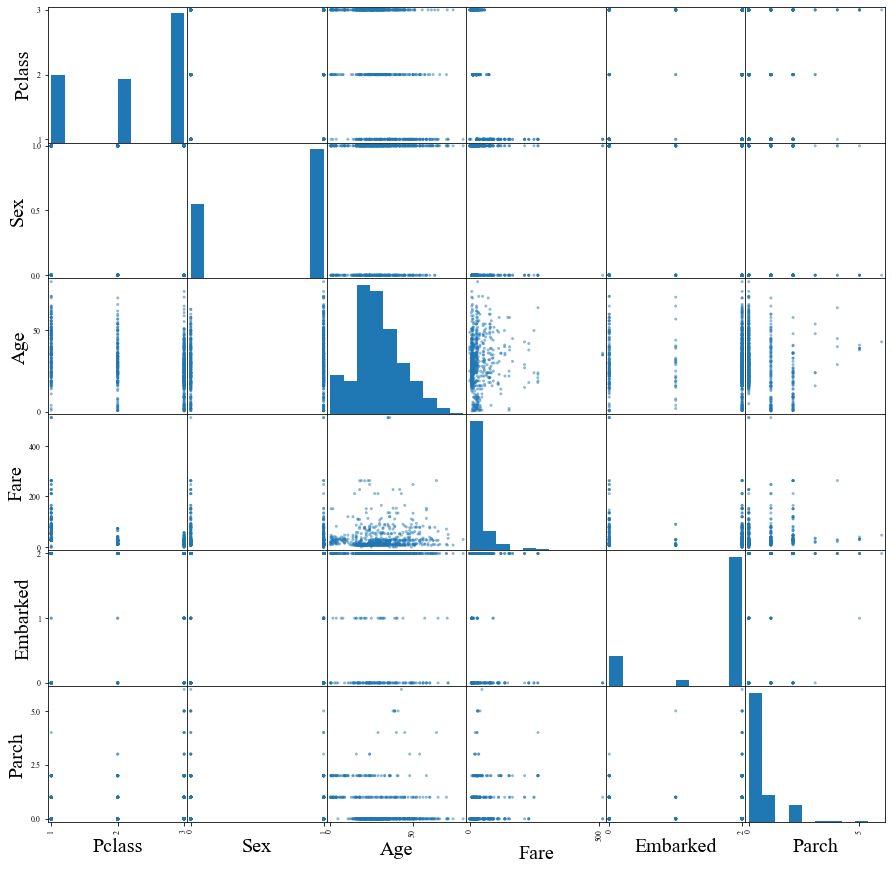

In [144]:
scatter_matrix(X_train_final, figsize=(15,15))
plt.show()

In [145]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

## Training the model

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_final, y_train, train_size=.8, random_state=42)

In [147]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=10)

In [148]:
lr.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [149]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, lr.predict(X_train))

0.7926186291739895

In [150]:
from sklearn.model_selection import cross_val_predict, cross_val_score

y_pred_cv = cross_val_predict(lr, X_train, y_train, cv=3)
cv_score =  cross_val_score(lr, X_train, y_train, cv=3)

In [151]:
y_pred_cv

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,

In [152]:
cv_score

array([0.74210526, 0.84736842, 0.79365079])

In [153]:
from sklearn.metrics import confusion_matrix

cnf_train = confusion_matrix(y_train, y_pred_cv)

In [154]:
cnf_train

array([[290,  54],
       [ 63, 162]], dtype=int64)

In [155]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[290  54]
 [ 63 162]]


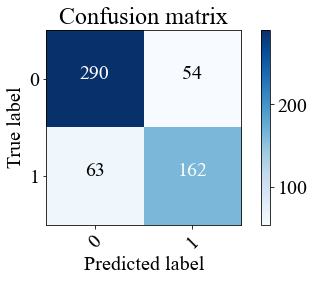

In [156]:
plot_confusion_matrix(cnf_train, lr.classes_)

In [157]:
y_test_pred = lr.predict(X_test)

In [158]:
accuracy_score(y_test, y_test_pred)

0.7972027972027972

Confusion matrix, without normalization
[[74  6]
 [23 40]]


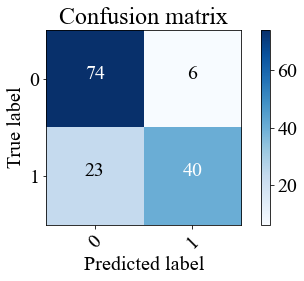

In [159]:
cnf_tst = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cnf_tst, lr.classes_)

Now lets see accuracy with sgd classifier

In [160]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(loss = 'log_loss', random_state=42)

In [161]:
sgd_clf.fit(X_train ,y_train)

SGDClassifier(loss='log_loss', random_state=42)

In [162]:
y_trn_cv_sgd = cross_val_predict(sgd_clf, X_train , y_train, cv=3)

Confusion matrix, without normalization
[[281  63]
 [118 107]]


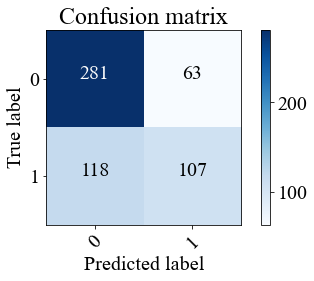

In [163]:
plot_confusion_matrix(confusion_matrix(y_train, y_trn_cv_sgd), sgd_clf.classes_)

In [164]:
sgd_cv_score = cross_val_score(sgd_clf, X_train , y_train, cv=3)
sgd_cv_score

array([0.72631579, 0.71578947, 0.6031746 ])

In [171]:
accuracy_score(y_train, sgd_clf.predict(X_train)), accuracy_score(y_test, sgd_clf.predict(X_test)), 

(0.7117750439367311, 0.6923076923076923)

Confusion matrix, without normalization
[[58 22]
 [22 41]]


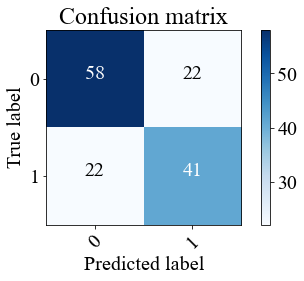

In [165]:
y_tst_prd = sgd_clf.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_test, y_tst_prd), sgd_clf.classes_)

SDG clf model is even poor

In [167]:
from sklearn.linear_model import RidgeClassifier
ridge_clf = RidgeClassifier(alpha=2)

In [168]:
ridge_clf.fit(X_train, y_train)

RidgeClassifier(alpha=2)

In [170]:
accuracy_score(y_train, ridge_clf.predict(X_train)), accuracy_score(y_test, ridge_clf.predict(X_test)), 

(0.7961335676625659, 0.7902097902097902)

In [172]:
cross_val_score(ridge_clf, X_train , y_train, cv=3)

array([0.75789474, 0.84736842, 0.77777778])

# doing on test data set for final output

In [205]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [206]:
testing_set = df_test[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Parch', 'PassengerId']]

In [188]:
testing_set.dropna(axis=0, inplace=True) #dropping all nan values bz ages can't be used and embarked too

c:\users\paude\appdata\local\programs\python\python38\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [189]:
testing_set

,Pclass,Sex,Age,Fare,Embarked,Parch,PassengerId
0,3,male,34.5,7.8292,Q,0,892
1,3,female,47.0,7.0000,S,0,893
2,2,male,62.0,9.6875,Q,0,894
3,3,male,27.0,8.6625,S,0,895
4,3,female,22.0,12.2875,S,1,896
...,...,...,...,...,...,...,...
409,3,female,3.0,13.7750,S,1,1301
411,1,female,37.0,90.0000,Q,0,1303
412,3,female,28.0,7.7750,S,0,1304
414,1,female,39.0,108.9000,C,0,1306


In [190]:
p_id = testing_set['PassengerId']

In [192]:
X = testing_set.drop('PassengerId', axis=1)

In [193]:
X

,Pclass,Sex,Age,Fare,Embarked,Parch
0,3,male,34.5,7.8292,Q,0
1,3,female,47.0,7.0000,S,0
2,2,male,62.0,9.6875,Q,0
3,3,male,27.0,8.6625,S,0
4,3,female,22.0,12.2875,S,1
...,...,...,...,...,...,...
409,3,female,3.0,13.7750,S,1
411,1,female,37.0,90.0000,Q,0
412,3,female,28.0,7.7750,S,0
414,1,female,39.0,108.9000,C,0


In [194]:
sex_cat  = X['Sex']
embarked_cat = X['Embarked']

ordinal_encoder = OrdinalEncoder()

sex_cat_encoded = ordinal_encoder.fit_transform(sex_cat.values.reshape(-1,1))
embarked_cat_encoded = ordinal_encoder.fit_transform(embarked_cat.values.reshape(-1,1))

X['Sex'] = sex_cat_encoded
X['Embarked'] = embarked_cat_encoded

In [195]:
X

,Pclass,Sex,Age,Fare,Embarked,Parch
0,3,1.0,34.5,7.8292,1.0,0
1,3,0.0,47.0,7.0000,2.0,0
2,2,1.0,62.0,9.6875,1.0,0
3,3,1.0,27.0,8.6625,2.0,0
4,3,0.0,22.0,12.2875,2.0,1
...,...,...,...,...,...,...
409,3,0.0,3.0,13.7750,2.0,1
411,1,0.0,37.0,90.0000,1.0,0
412,3,0.0,28.0,7.7750,2.0,0
414,1,0.0,39.0,108.9000,0.0,0


In [196]:
y_hat = lr.predict(X)

In [197]:
y_hat

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,

In [199]:
y_hat.shape

(331,)

In [200]:
p_id.shape

(331,)

In [201]:
submit_dict = {'PassengerId':p_id, 'Survived':y_hat}

In [202]:
submit_df = pd.DataFrame(submit_dict)

In [203]:
submit_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
409,1301,1
411,1303,1
412,1304,1
414,1306,1


In [204]:
submit_df.to_csv("Submit_file.csv")

In [210]:
testing_set.notna() #dropping all nan values bz ages can't be used and embarked too

,Pclass,Sex,Age,Fare,Embarked,Parch,PassengerId
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...
413,True,True,False,True,True,True,True
414,True,True,True,True,True,True,True
415,True,True,True,True,True,True,True
416,True,True,False,True,True,True,True


In [224]:
rem_psg = testing_set['PassengerId'][~testing_set.notna()['Age']].values

In [218]:
all(testing_set.notna()['Age'])

False

In [217]:
testing_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    int64  
 1   Sex          418 non-null    object 
 2   Age          332 non-null    float64
 3   Fare         417 non-null    float64
 4   Embarked     418 non-null    object 
 5   Parch        418 non-null    int64  
 6   PassengerId  418 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [225]:
rem_psg

array([ 902,  914,  921,  925,  928,  931,  933,  939,  946,  950,  957,
        968,  975,  976,  977,  980,  983,  985,  994,  999, 1000, 1003,
       1008, 1013, 1016, 1019, 1024, 1025, 1038, 1040, 1043, 1052, 1055,
       1060, 1062, 1065, 1075, 1080, 1083, 1091, 1092, 1097, 1103, 1108,
       1111, 1117, 1119, 1125, 1135, 1136, 1141, 1147, 1148, 1157, 1158,
       1159, 1160, 1163, 1165, 1166, 1174, 1178, 1180, 1181, 1182, 1184,
       1189, 1193, 1196, 1204, 1224, 1231, 1234, 1236, 1249, 1250, 1257,
       1258, 1272, 1274, 1276, 1300, 1302, 1305, 1308, 1309], dtype=int64)

In [226]:
rem_pr_df = pd.DataFrame({'Pid':rem_psg, 'sur':np.zeros_like(rem_psg)})

In [227]:
rem_pr_df.to_csv("rem.csv")